In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [72]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
#Splitting Dataset into Training Set and Test Set
split = 0.8
split_size = int(split * len(X))
X_train = X.iloc[:split_size, :].to_numpy()
Y_train = Y.iloc[:split_size].values
X_test = X.iloc[split_size:, :].values
Y_test = Y.iloc[split_size:].values

In [75]:
def data_summary():
    print('X_train : ', X_train.shape)
    print('Y_train : ', Y_train.shape)
    print('X_test : ', X_test.shape)
    print('Y_test : ', Y_test.shape)
    print(type(X_train))
data_summary()

X_train :  (614, 8)
Y_train :  (614,)
X_test :  (154, 8)
Y_test :  (154,)
<class 'numpy.ndarray'>


In [79]:
X_train[0:3]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ]])

In [77]:
Y_train[0:9]

array([1, 0, 1, 0, 1, 0, 1, 0, 1])

In [80]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)
    
X_train = standardize(X_train)
X_test = standardize(X_test)

In [81]:
X_train[0:3]

array([[-0.66275355,  1.75580132,  0.4613635 , -0.16882333, -0.76494601,
        -0.19266824, -0.7542669 ,  0.08665782],
       [-0.74791393,  0.6827805 ,  0.35917104, -0.27101579, -0.76494601,
        -0.31189277, -0.75896775, -0.23695164],
       [-0.6286894 ,  2.351924  ,  0.32510689, -0.76494601, -0.76494601,
        -0.36809863, -0.75350045, -0.21991956]])

In [108]:
ann = tf.keras.Sequential()
# ann.add(tf.keras.layers.Flatten())
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [109]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = ann.fit(X_train, Y_train, epochs = 1000)

In [119]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
prediction = np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1)
prediction[0:10]

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0]])

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[85 14]
 [24 31]]


0.7532467532467533

In [117]:
ann.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


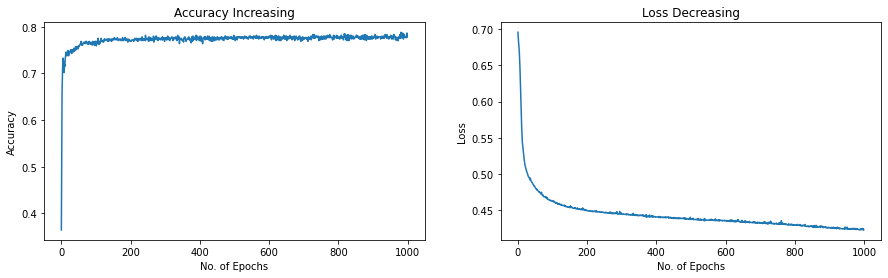

In [120]:
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(1,2,1)
plt.title('Accuracy Increasing')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
ax2 = fig.add_subplot(1,2,2)
plt.title('Loss Decreasing')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()